In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load CSV File
df = pd.read_csv("Daily.csv")
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [46]:
print(df.isnull().sum())
df['Subcategory'] = df['Subcategory'].fillna('Unknown')
df['Note'] = df['Note'].fillna('Unknown')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.drop_duplicates(inplace=True)

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


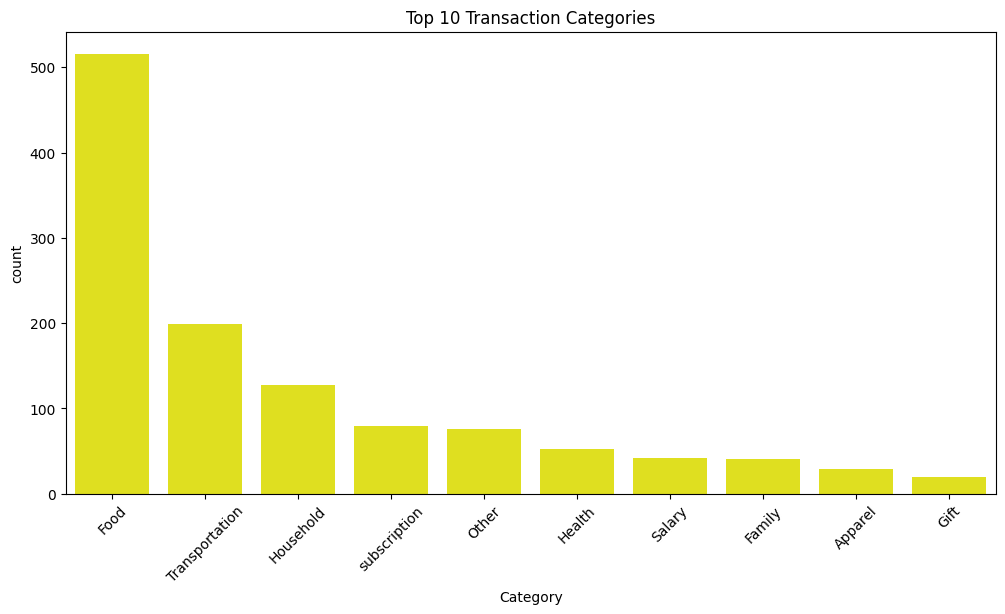

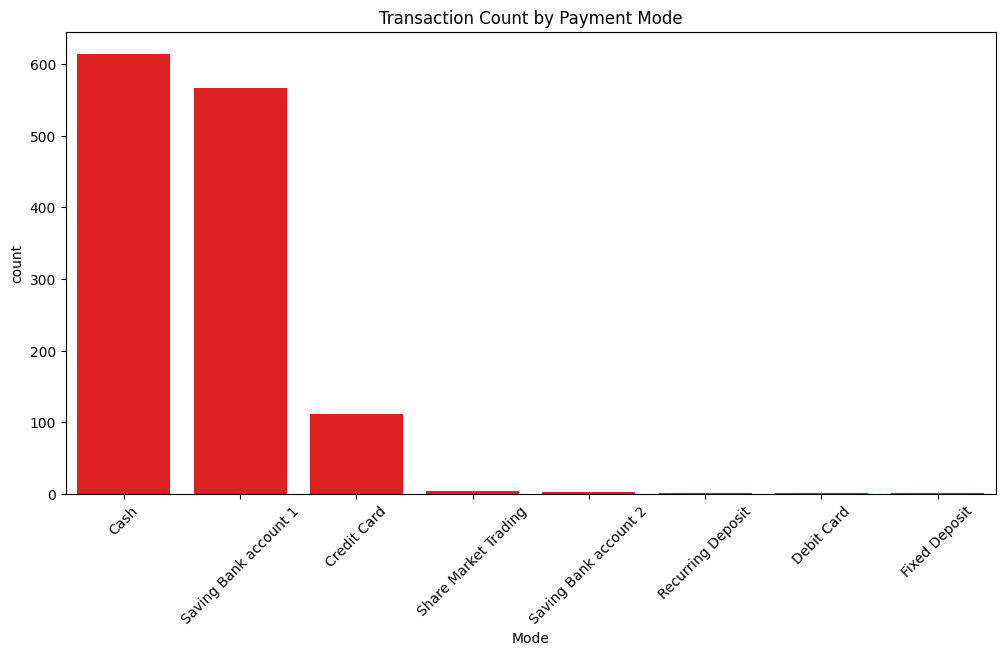

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().head(10).index, color='yellow')
plt.title('Top 10 Transaction Categories')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Mode', order=df['Mode'].value_counts().index, color='red')
plt.title('Transaction Count by Payment Mode')
plt.xticks(rotation=45)
plt.show()

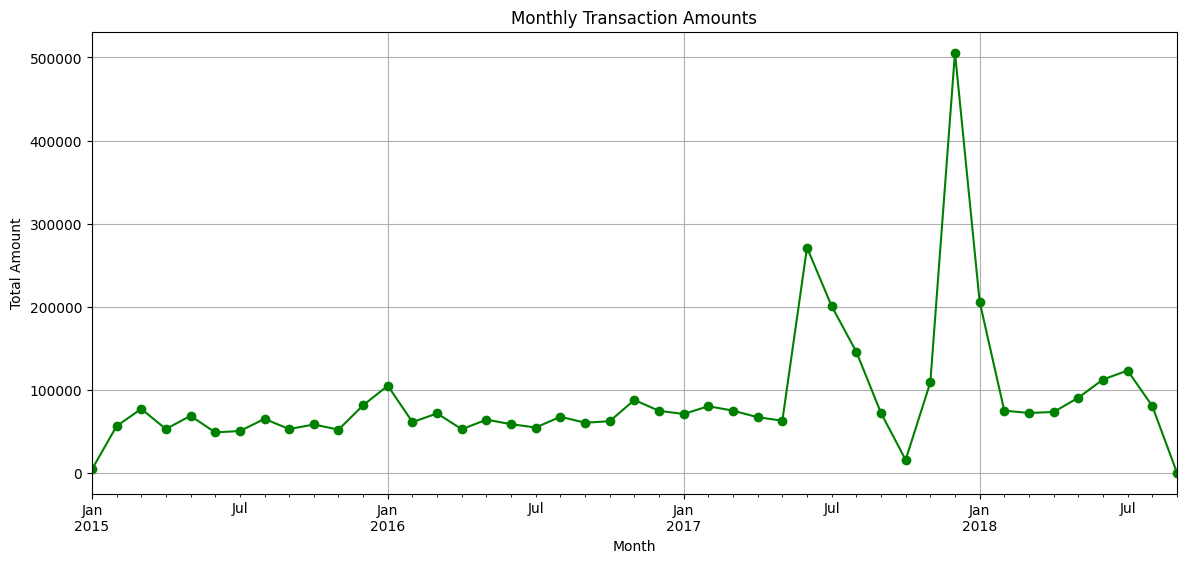

In [33]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Monthly Transaction Amounts
monthly = df.resample('ME')['Amount'].sum()
plt.figure(figsize=(14,6))
monthly.plot(marker='o', color='green')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

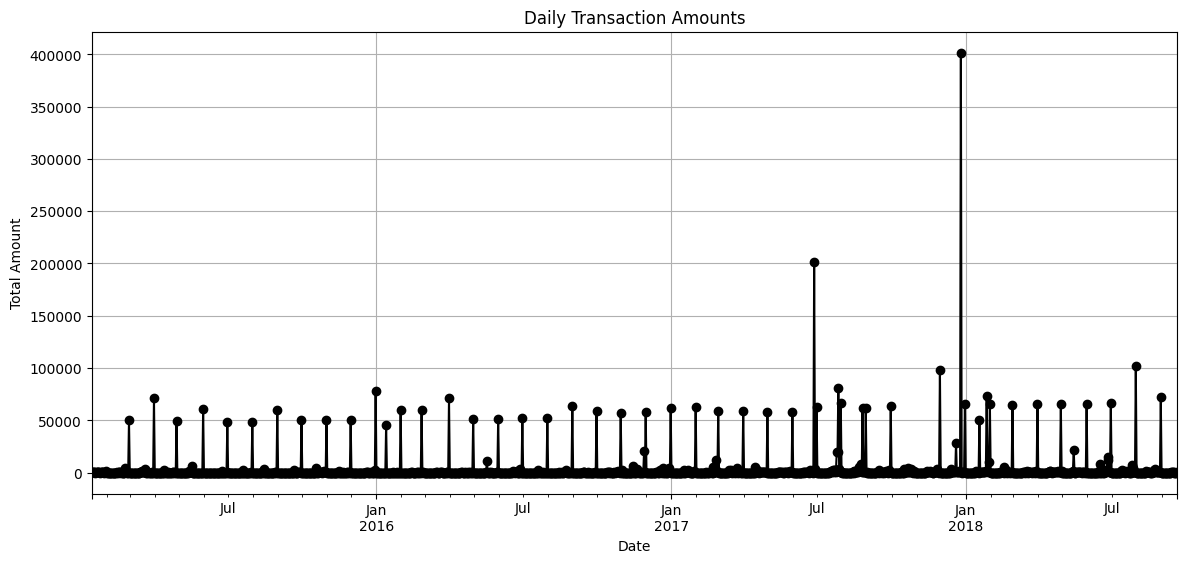

In [34]:
daily = df.resample('D')['Amount'].sum()
plt.figure(figsize=(14,6))
daily.plot(marker='o', color='black')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

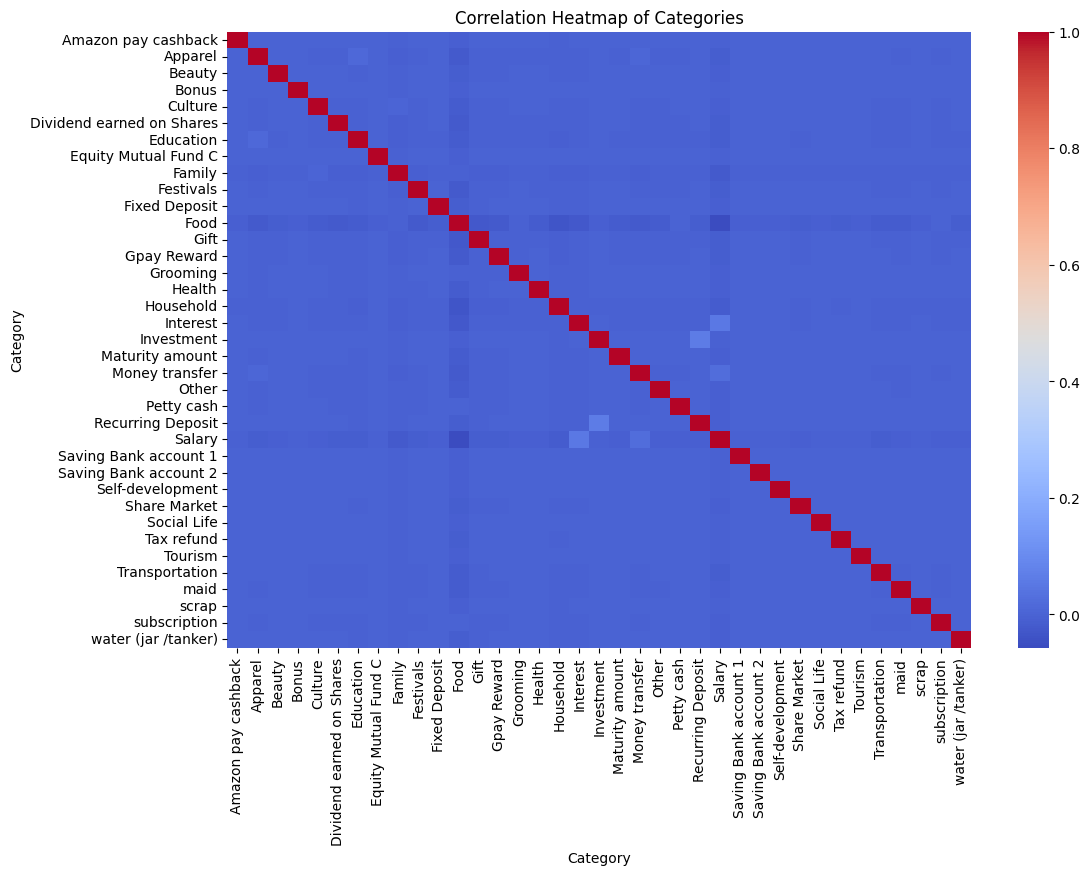

In [35]:
pivot = df.pivot_table(index=df.index, columns='Category', values='Amount', aggfunc='sum', fill_value=0)
corr = pivot.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Categories')
plt.show()

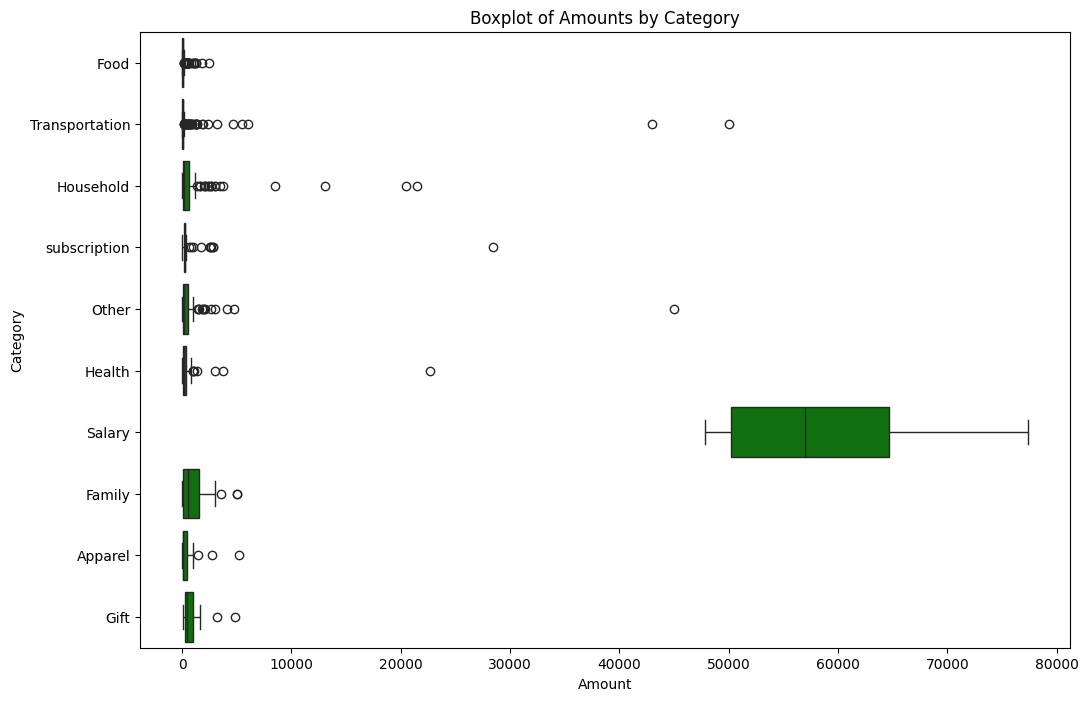

In [36]:
top_categories = df['Category'].value_counts().head(10).index.drop_duplicates()

# Drop rows where Category is NaN or not in top_categories
filtered_df = df[df['Category'].isin(top_categories)]
# Boxplot by Category

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Amount', y='Category', order=top_categories, color='green')
plt.title('Boxplot of Amounts by Category')
plt.show()

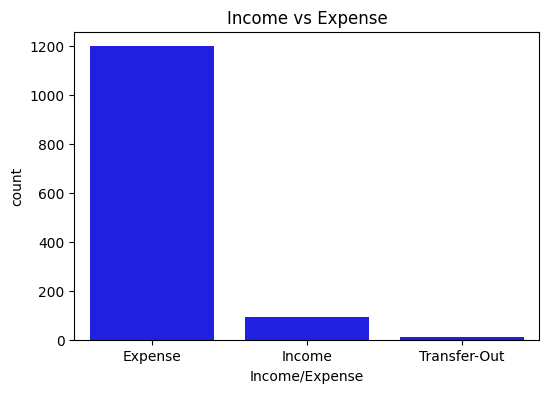

In [37]:
# Income vs Expense
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Income/Expense', color='blue')
plt.title('Income vs Expense')
plt.show()